In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns
sns.set()

# Import et EDA

Nous utilisons un jeu de données qui contient 5000 clients d'une société de telecom. La première colonne indique si les clients ont, ou non, résilié. Les suivantes sont d'éventuels facteurs explicatifs.

In [3]:
# https://query.data.world/s/jb75k2kxn5ajlcxsmvlnorxyj4pisx
df = pd.read_csv('https://bit.ly/2Pkupqx')

df.info()

df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
churn                         5000 non-null object
accountlength                 5000 non-null int64
internationalplan             5000 non-null object
voicemailplan                 5000 non-null object
numbervmailmessages           5000 non-null int64
totaldayminutes               5000 non-null float64
totaldaycalls                 5000 non-null int64
totaldaycharge                5000 non-null float64
totaleveminutes               5000 non-null float64
totalevecalls                 5000 non-null int64
totalevecharge                5000 non-null float64
totalnightminutes             5000 non-null float64
totalnightcalls               5000 non-null int64
totalnightcharge              5000 non-null float64
totalintlminutes              5000 non-null float64
totalintlcalls                5000 non-null int64
totalintlcharge               5000 non-null float64
numbercustomerservicecal

churn  accountlength internationalplan voicemailplan  \
3961   Yes            117                no            no   
817     No            243                no            no   
4571    No             98                no            no   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
3961                    0            180.6            134           30.70   
817                     0             95.5             92           16.24   
4571                    0            243.4             88           41.38   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
3961            216.6             96           18.41              101.0   
817             163.7             63           13.91              264.2   
4571            147.1            155           12.50              156.4   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
3961              122              4.55              10.6               6   
817               118             11.89               6.6               6   
4571               80              7.04               9.7               4   

      totalintlcharge  numbercustomerservicecalls  
3961             2.86                           4  
817              1.78                           2  
4571             2.62                           2

In [4]:
df.sample(10)

churn  accountlength internationalplan voicemailplan  \
79      No             70                no            no   
4137   Yes             76                no            no   
4998    No            109                no            no   
4215    No             58                no           yes   
2969    No            116                no            no   
1341    No             31                no           yes   
3654    No             72                no            no   
3205   Yes            111                no            no   
4292   Yes             78               yes            no   
4191    No            119                no            no   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
79                      0            170.2             98           28.93   
4137                    0            222.0             99           37.74   
4998                    0            188.8             67           32.10   
4215                   29            239.6             84           40.73   
2969                    0            110.9             54           18.85   
1341                   28            210.5            101           35.79   
3654                    0            180.0            109           30.60   
3205                    0            294.7             90           50.10   
4292                    0            198.9             93           33.81   
4191                    0            107.2            100           18.22   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
79              155.2            102           13.19              228.6   
4137            215.9            122           18.35              204.1   
4998            171.7             92           14.59              224.4   
4215            182.1             80           15.48              118.3   
2969            213.4             82           18.14              186.2   
1341            250.5             86           21.29              241.6   
3654            292.7             96           24.88              194.9   
3205            294.6             72           25.04              260.1   
4292            210.6             86           17.90              252.1   
4191            221.1            100           18.79              212.6   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
79                 76             10.29              15.0               2   
4137              131              9.18               8.2               5   
4998               89             10.10               8.5               6   
4215              100              5.32              11.0               3   
2969              116              8.38               7.9               2   
1341              125             10.87              11.5               2   
3654              114              8.77              10.8               4   
3205              121             11.70              10.8               3   
4292               99             11.34              14.4              12   
4191               96              9.57               8.3               3   

      totalintlcharge  numbercustomerservicecalls  
79               4.05                           1  
4137             2.21                           3  
4998             2.30                           0  
4215             2.97                           2  
2969             2.13                           2  
1341             3.11                           1  
3654             2.92                           0  
3205             2.92                           1  
4292             3.89                           0  
4191             2.24                           2

In [5]:
df.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count     5000.00000          5000.000000      5000.000000    5000.000000   
mean       100.25860             7.755200       180.288900     100.029400   
std         39.69456            13.546393        53.894699      19.831197   
min          1.00000             0.000000         0.000000       0.000000   
25%         73.00000             0.000000       143.700000      87.000000   
50%        100.00000             0.000000       180.100000     100.000000   
75%        127.00000            17.000000       216.200000     113.000000   
max        243.00000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.649668       200.636560     100.191000       17.054322   
std          9.162069        50.551309      19.826496        4.296843   
min          0.000000         0.000000       0.000000        0.000000   
25%         24.430000       166.375000      87.000000       14.140000   
50%         30.620000       201.000000     100.000000       17.090000   
75%         36.750000       234.100000     114.000000       19.900000   
max         59.760000       363.700000     170.000000       30.910000   

       totalnightminutes  totalnightcalls  totalnightcharge  totalintlminutes  \
count        5000.000000      5000.000000       5000.000000       5000.000000   
mean          200.391620        99.919200          9.017732         10.261780   
std            50.527789        19.958686          2.273763          2.761396   
min             0.000000         0.000000          0.000000          0.000000   
25%           166.900000        87.000000          7.510000          8.500000   
50%           200.400000       100.000000          9.020000         10.300000   
75%           234.700000       113.000000         10.560000         12.000000   
max           395.000000       175.000000         17.770000         20.000000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     5000.000000      5000.000000                 5000.000000  
mean         4.435200         2.771196                    1.570400  
std          2.456788         0.745514                    1.306363  
min          0.000000         0.000000                    0.000000  
25%          3.000000         2.300000                    1.000000  
50%          4.000000         2.780000                    1.000000  
75%          6.000000         3.240000                    2.000000  
max         20.000000         5.400000                    9.000000

Combien de personnes ont résilié ?

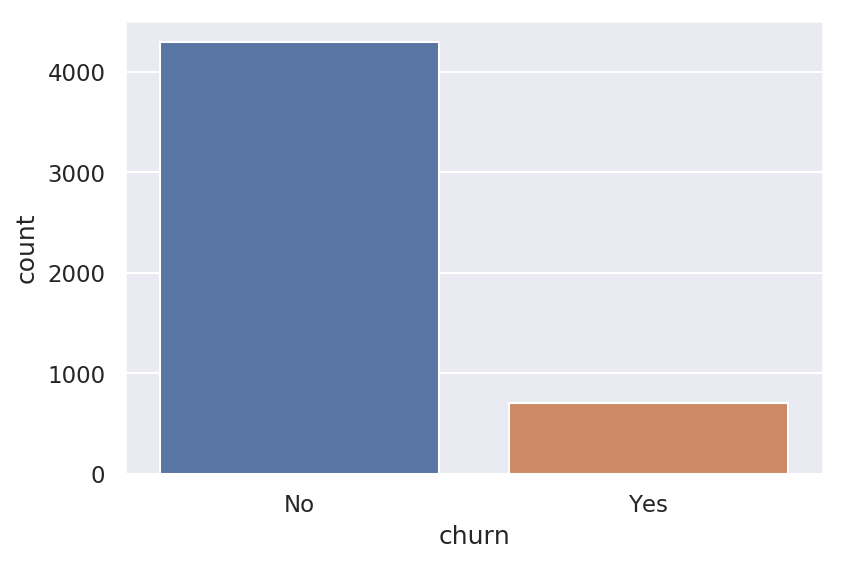

In [6]:
fig, ax = plt.subplots(1, 1, dpi=150)
sns.countplot(df['churn'], ax=ax)
plt.show()

In [7]:
df['churn'].value_counts() / len(df)

No     0.8586
Yes    0.1414
Name: churn, dtype: float64

In [8]:
X = df.drop(columns=['churn'])
for col in ['internationalplan', 'voicemailplan']:
    X[col] = (X[col] == 'yes')

y = (df['churn'] == 'Yes')

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X, y)

y_pred = clf.predict(X)

print(y[10:20].values)
print(y_pred[10:20])

[ True False False False False  True False False False False]
[False False False False False  True False False False False]


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Précision : {precision_score(y, y_pred)}")
print(f"Rappel : {recall_score(y, y_pred)}")
print(f"F1 : {f1_score(y, y_pred)}")

Précision : 0.8874172185430463
Rappel : 0.37906647807637905
F1 : 0.5312190287413281


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Précision : {precision_score(y_test, y_pred)}")
print(f"Rappel : {recall_score(y_test, y_pred)}")
print(f"F1 : {f1_score(y_test, y_pred)}")

Précision : 0.7032967032967034
Rappel : 0.3018867924528302
F1 : 0.4224422442244224


In [12]:
import numpy as np

y_pred = np.random.choice([True, False], size=len(y))

print(f"Précision : {precision_score(y, y_pred)}")
print(f"Rappel : {recall_score(y, y_pred)}")
print(f"F1 : {f1_score(y, y_pred)}")

Précision : 0.1443217665615142
Rappel : 0.5176803394625177
F1 : 0.2257169287696577


In [13]:
import autosklearn.classification
import autosklearn.metrics

/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
automl = autosklearn.classification.AutoSklearnClassifier()

automl.fit(X_train, y_train, metric=autosklearn.metrics.f1)

y_pred = automl.predict(X_test)

print(f"Précision : {precision_score(y_test, y_pred)}")
print(f"Rappel : {recall_score(y_test, y_pred)}")
print(f"F1 : {f1_score(y_test, y_pred)}")

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[WARNING] [2019-04-07 16:41:01,452:EnsembleBuilder(1):96025e47484d5c7c95cffbdd1e899e13] No models better than random - using Dummy Score!


/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[WARNING] [2019-04-07 16:41:01,485:EnsembleBuilder(1):96025e47484d5c7c95cffbdd1e899e13] No models better than random - using Dummy Score!


/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-p

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_trai

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-p

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and 

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-p

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_trai

/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-p

/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.


/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-p

/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_trai

/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.


Précision : 0.9459459459459459
Rappel : 0.8254716981132075
F1 : 0.8816120906801007


In [19]:
from joblib import dump
dump(automl, 'humantalks_automl.joblib')

['humantalks_automl.joblib']

In [16]:
from joblib import load

automl = load('humantalks_automl.joblib')

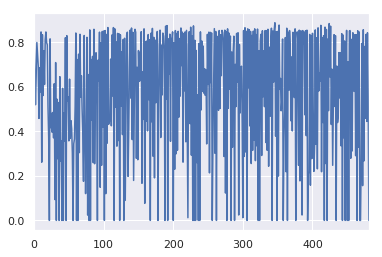

In [20]:
pd.DataFrame(automl.cv_results_)['mean_test_score'].plot()

In [21]:
df = pd.DataFrame(automl.cv_results_)
df.sample(5)

mean_test_score  mean_fit_time  \
215         0.837838       2.428334   
235         0.564516      14.333121   
232         0.000000       0.961553   
368         0.785714       1.169826   
426         0.872131      14.291553   

                                                params  rank_test_scores  \
215  {'balancing:strategy': 'none', 'categorical_en...               105   
235  {'balancing:strategy': 'none', 'categorical_en...               256   
232  {'balancing:strategy': 'weighting', 'categoric...               432   
368  {'balancing:strategy': 'none', 'categorical_en...               178   
426  {'balancing:strategy': 'weighting', 'categoric...                 7   

      status param_balancing:strategy param_categorical_encoding:__choice__  \
215  Success                     none                      one_hot_encoding   
235  Success                     none                      one_hot_encoding   
232  Success                weighting                      one_hot_encoding   
368  Success                     none                      one_hot_encoding   
426  Success                weighting                           no_encoding   

    param_classifier:__choice__ param_imputation:strategy  \
215           gradient_boosting             most_frequent   
235               random_forest                      mean   
232                         qda             most_frequent   
368               random_forest                      mean   
426           gradient_boosting                    median   

        param_preprocessor:__choice__  ...  \
215                  no_preprocessing  ...   
235                        polynomial  ...   
232  select_percentile_classification  ...   
368                  no_preprocessing  ...   
426                        polynomial  ...   

    param_classifier:xgradient_boosting:normalize_type  \
215                                                NaN   
235                                                NaN   
232                                                NaN   
368                                                NaN   
426                                                NaN   

    param_classifier:xgradient_boosting:rate_drop  \
215                                           NaN   
235                                           NaN   
232                                           NaN   
368                                           NaN   
426                                           NaN   

    param_classifier:xgradient_boosting:sample_type  \
215                                             NaN   
235                                             NaN   
232                                             NaN   
368                                             NaN   
426                                             NaN   

     param_preprocessor:fast_ica:n_components  \
215                                       NaN   
235                                       NaN   
232                                       NaN   
368                                       NaN   
426                                       NaN   

     param_preprocessor:kernel_pca:coef0  \
215                                  NaN   
235                                  NaN   
232                                  NaN   
368                                  NaN   
426                                  NaN   

     param_preprocessor:kernel_pca:degree  \
215                                   NaN   
235                                   NaN   
232                                   NaN   
368                                   NaN   
426                                   NaN   

     param_preprocessor:kernel_pca:gamma  \
215                                  NaN   
235                                  NaN   
232                                  NaN   
368                                  NaN   
426                                  NaN   

    param_preprocessor:nystroem_sampler:coef0  \
215                                       NaN   
2

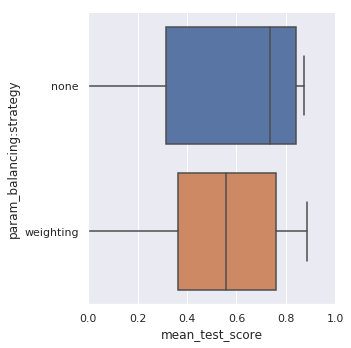

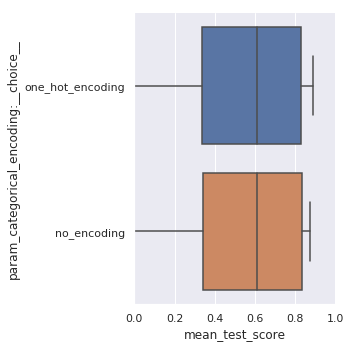

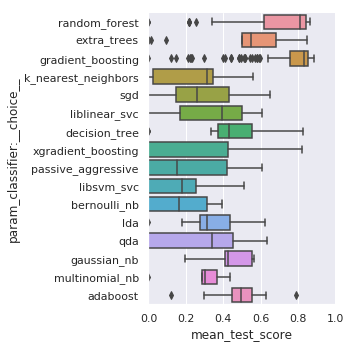

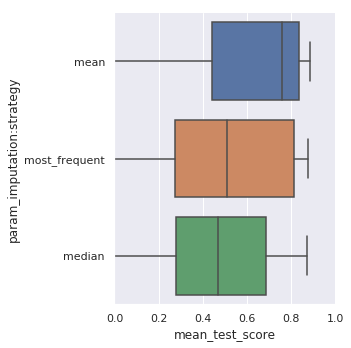

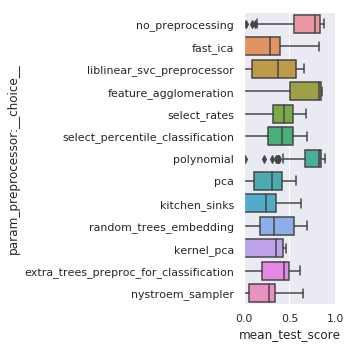

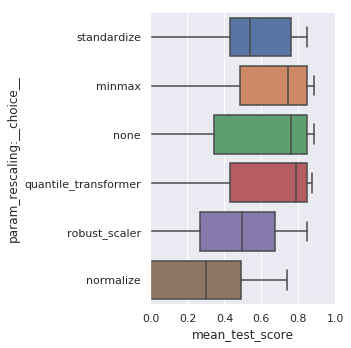

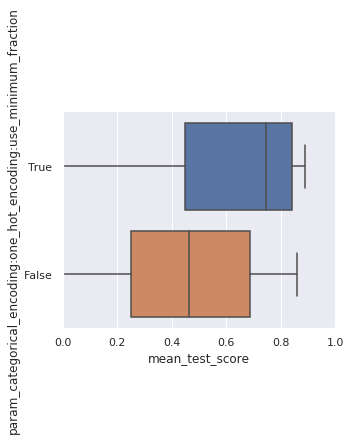

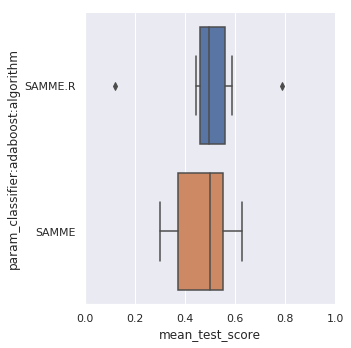

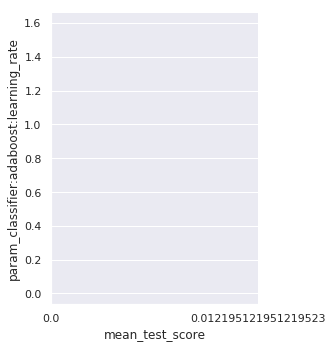

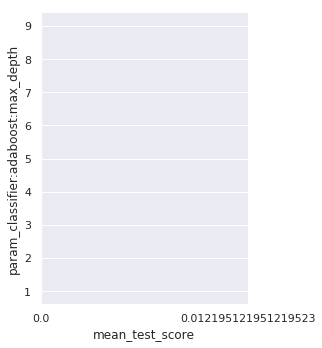

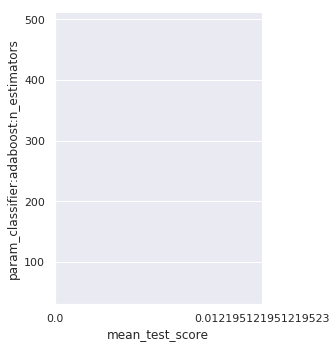

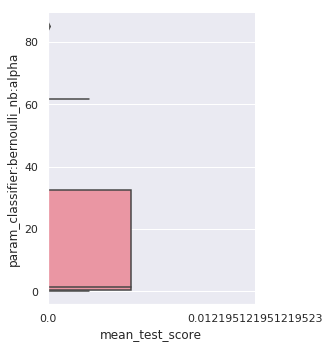

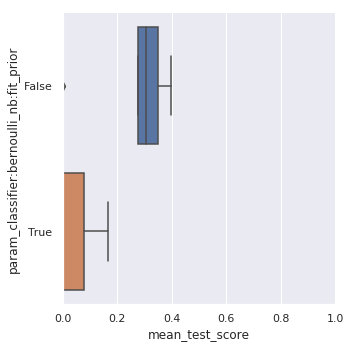

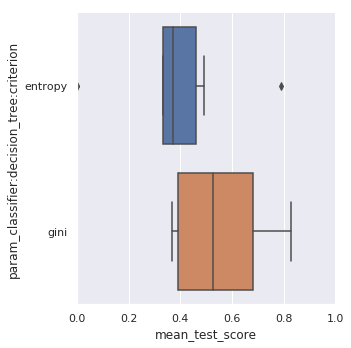

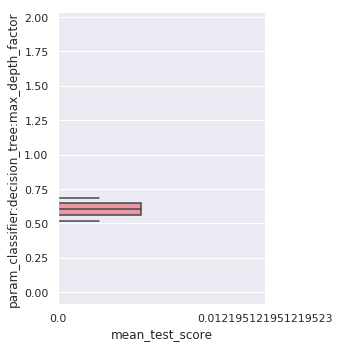

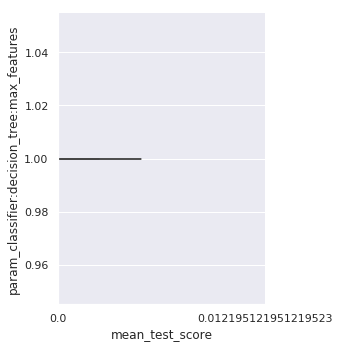

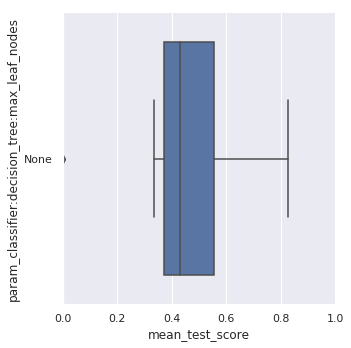

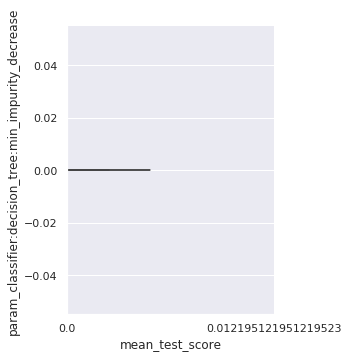

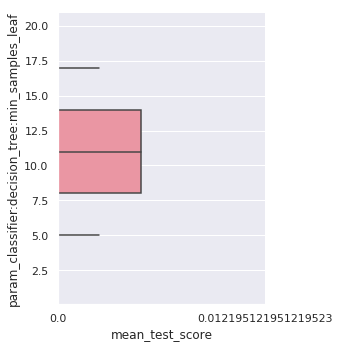

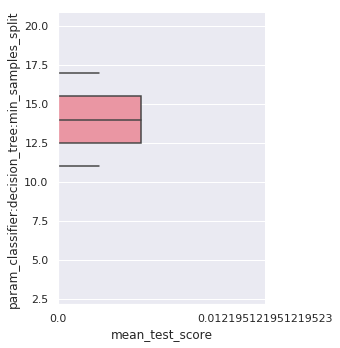

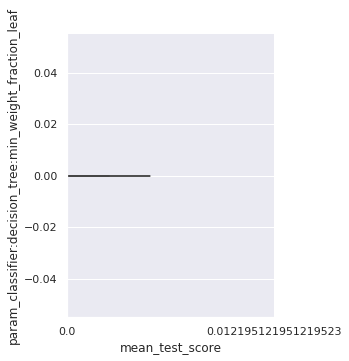

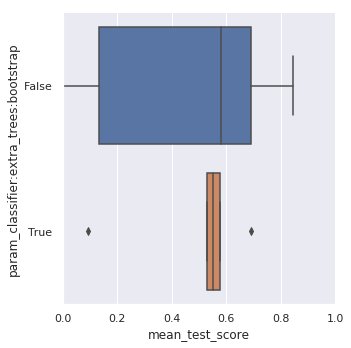

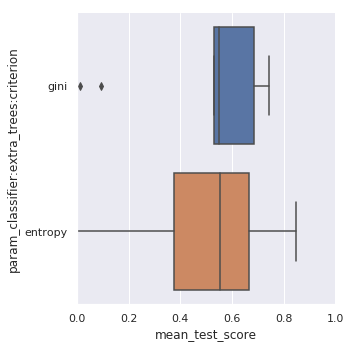

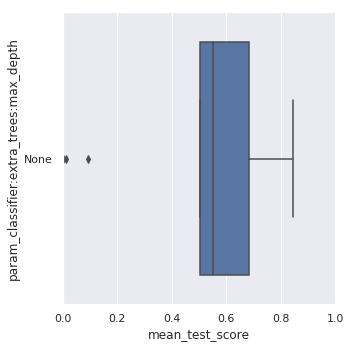

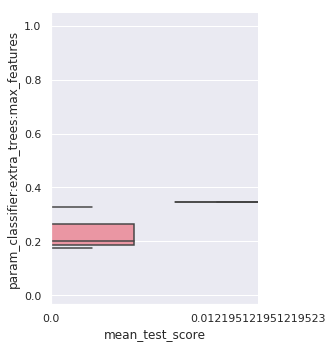

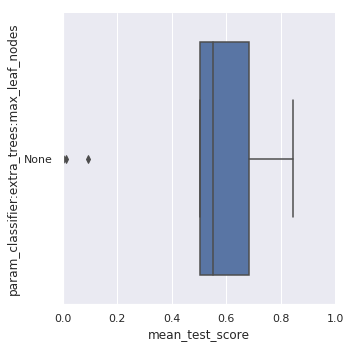

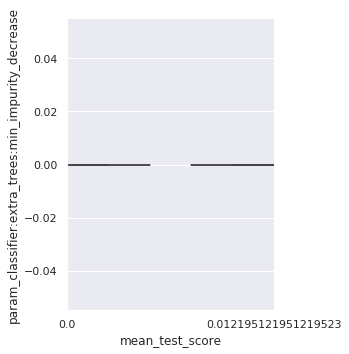

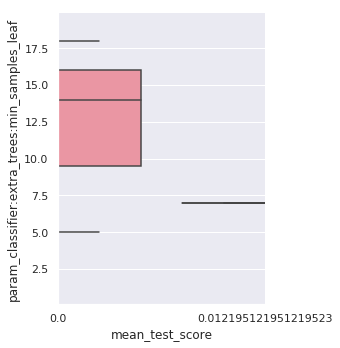

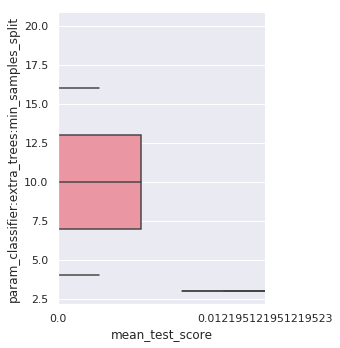

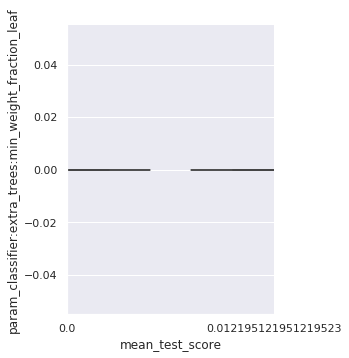

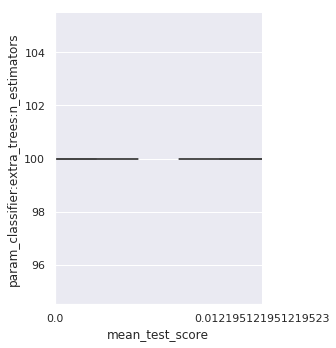

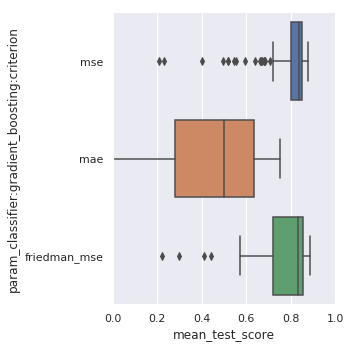

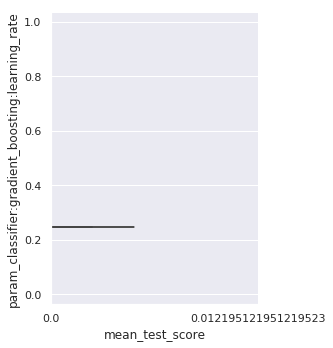

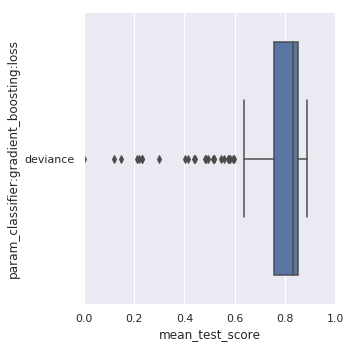

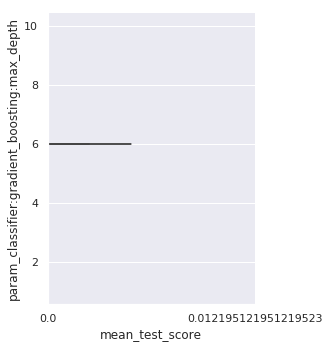

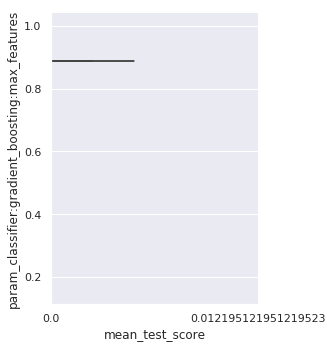

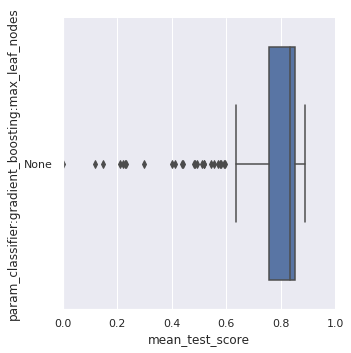

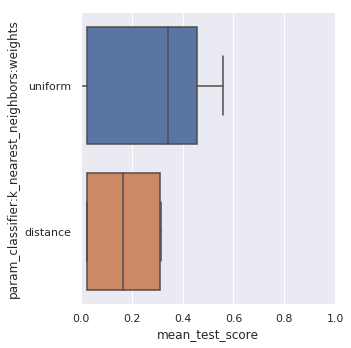

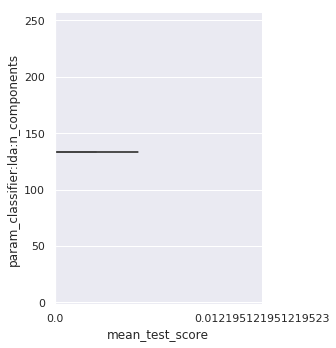

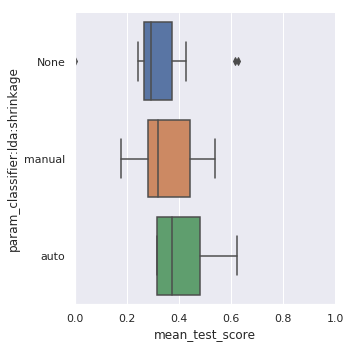

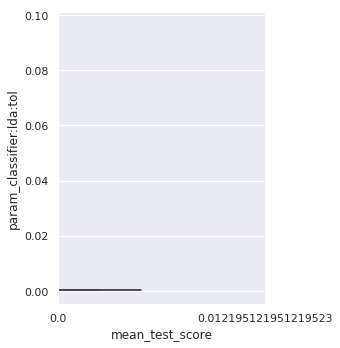

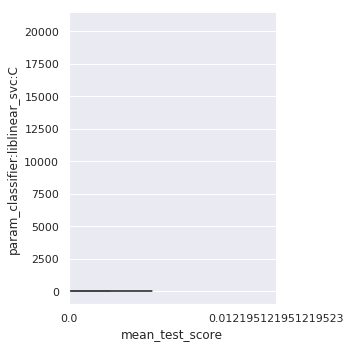

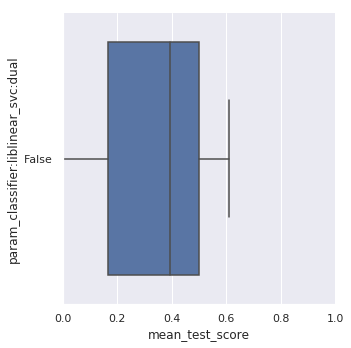

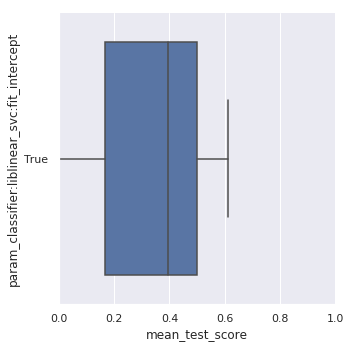

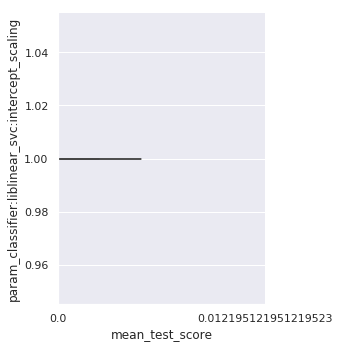

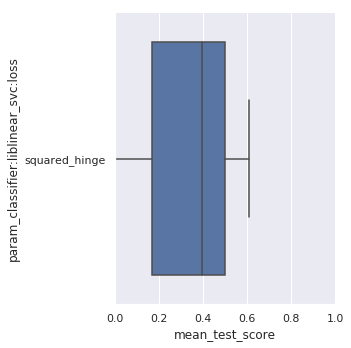

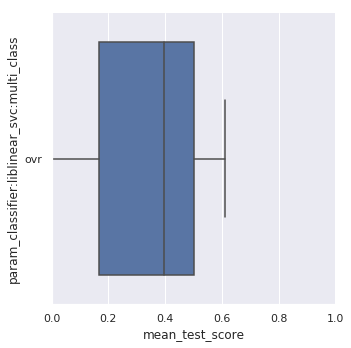

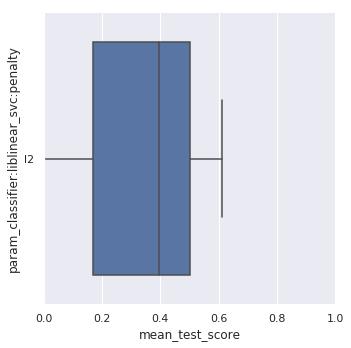

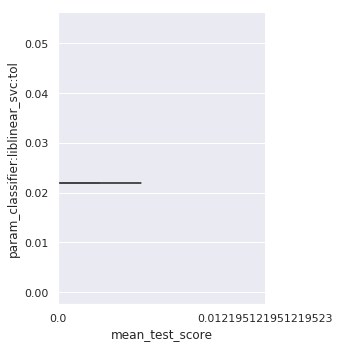

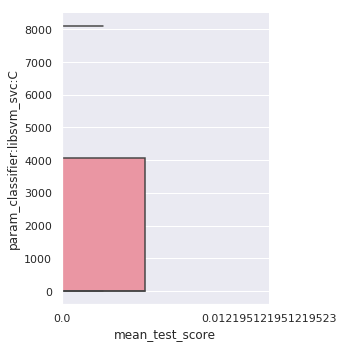

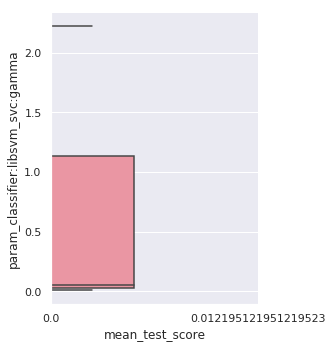

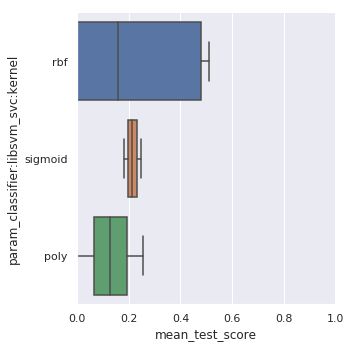

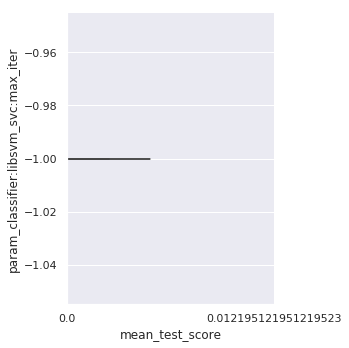

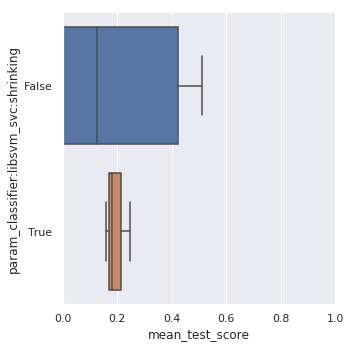

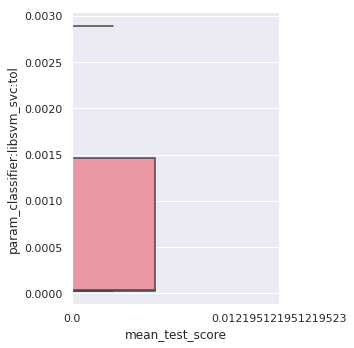

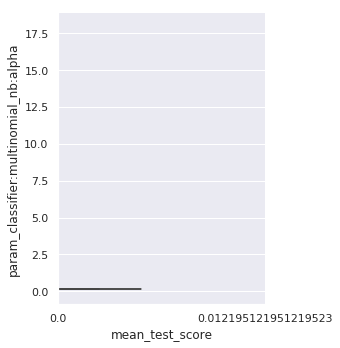

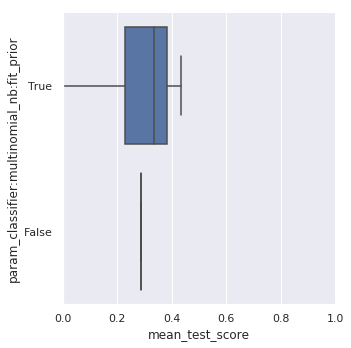

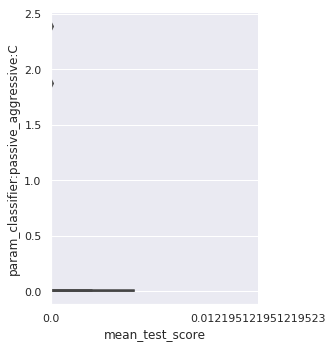

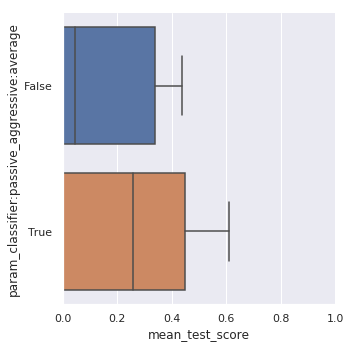

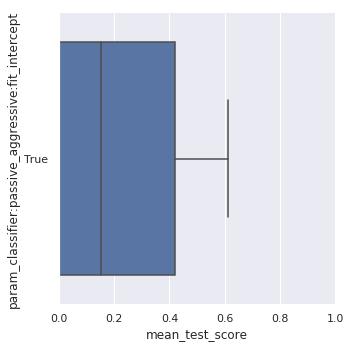

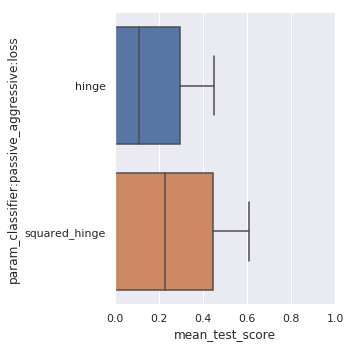

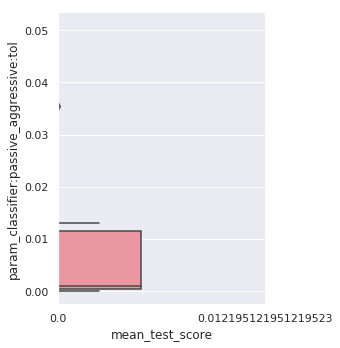

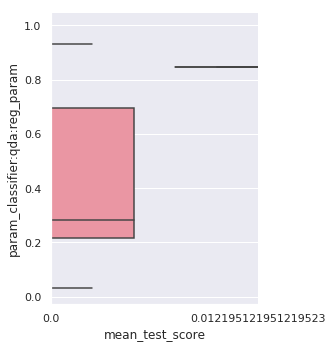

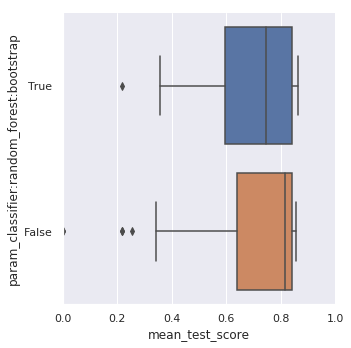

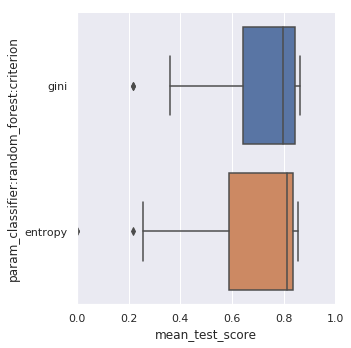

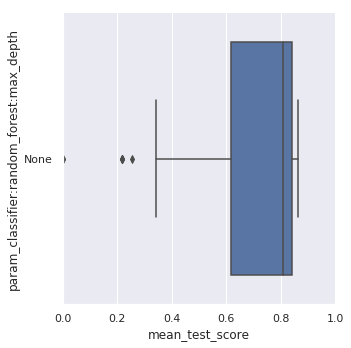

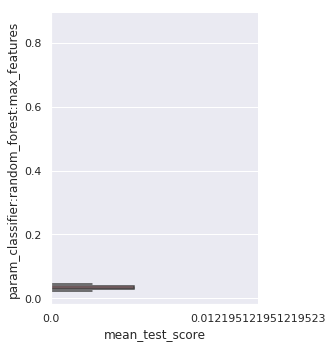

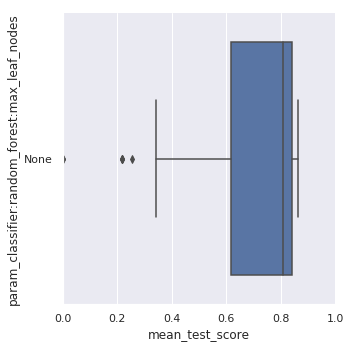

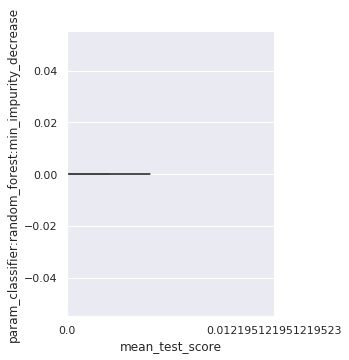

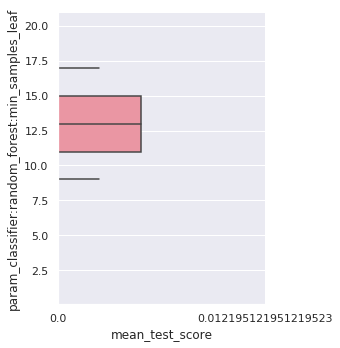

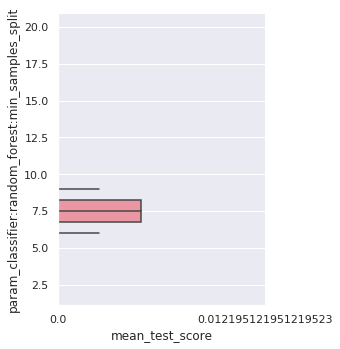

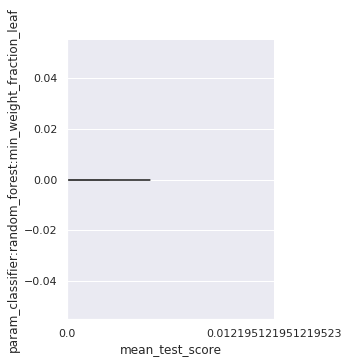

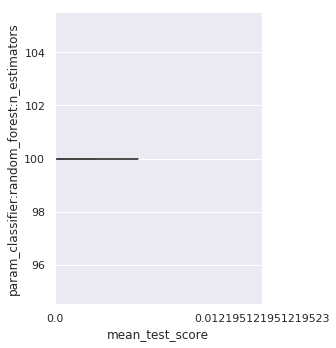

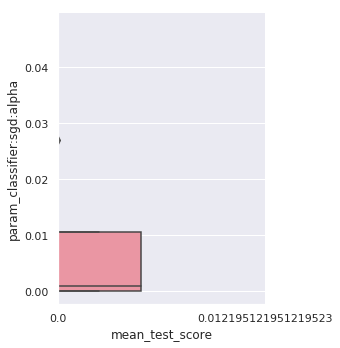

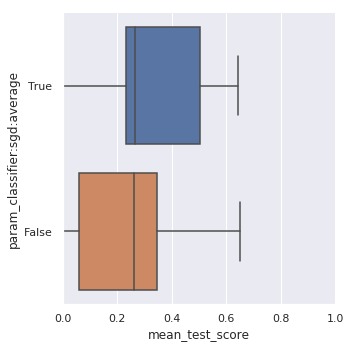

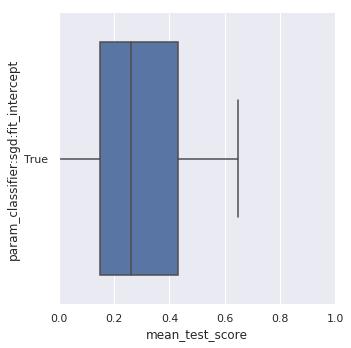

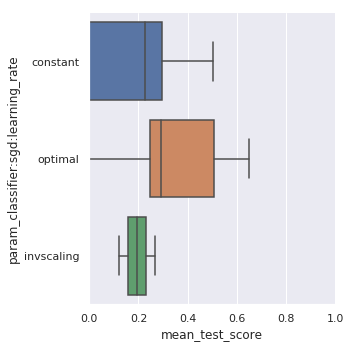

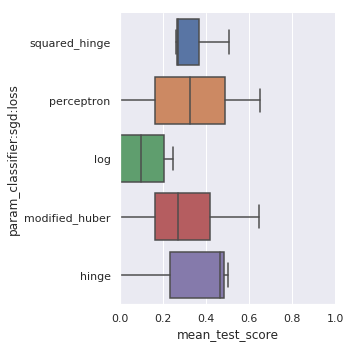

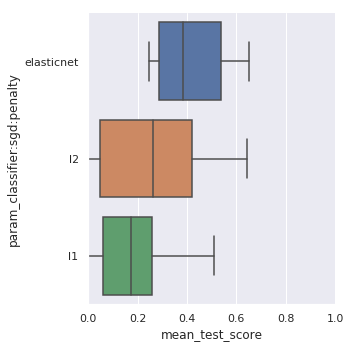

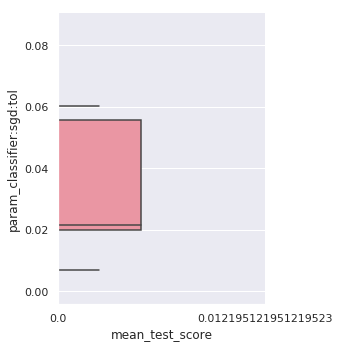

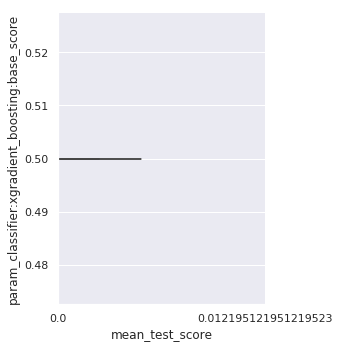

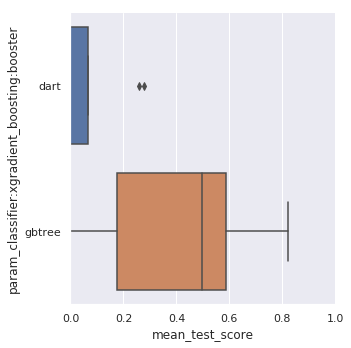

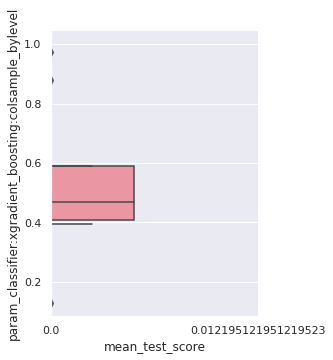

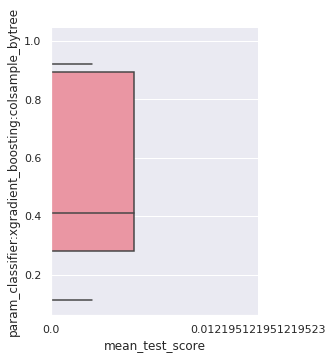

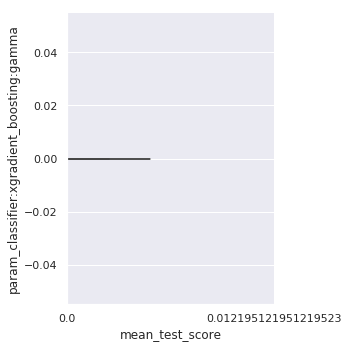

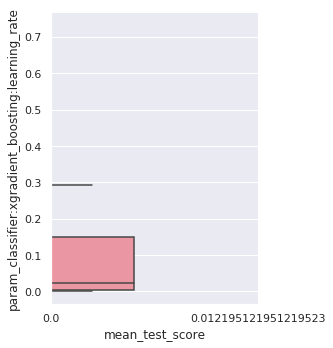

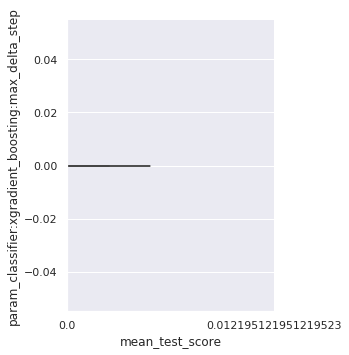

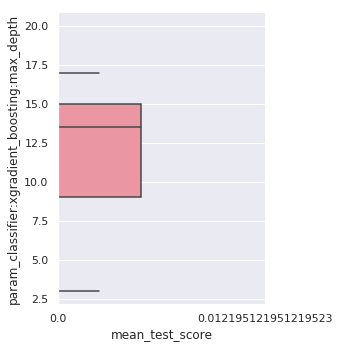

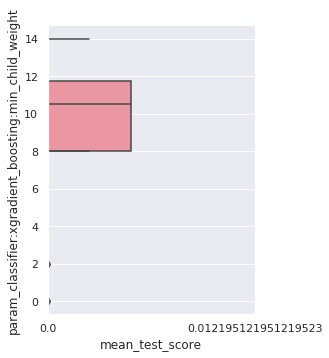

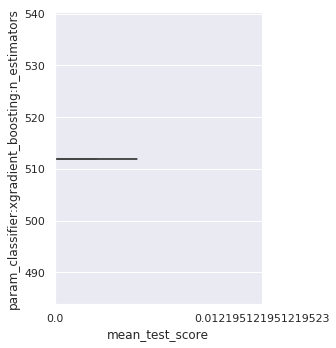

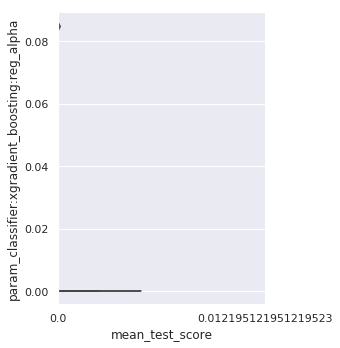

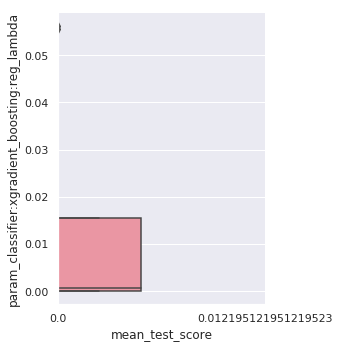

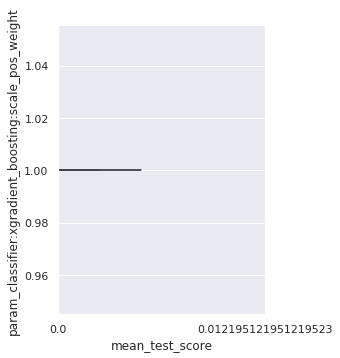

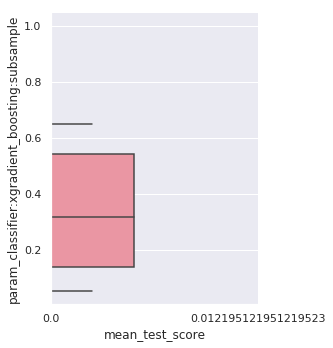

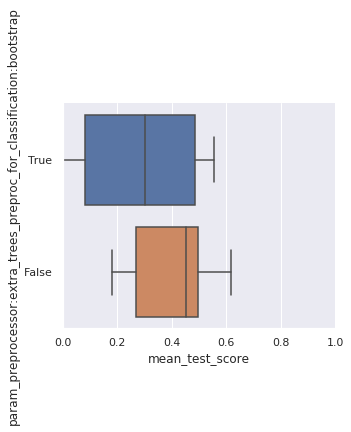

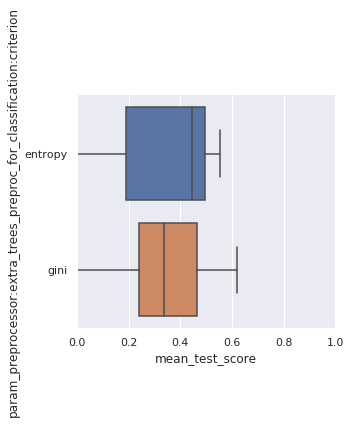

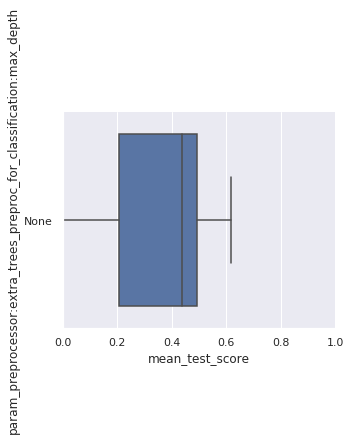

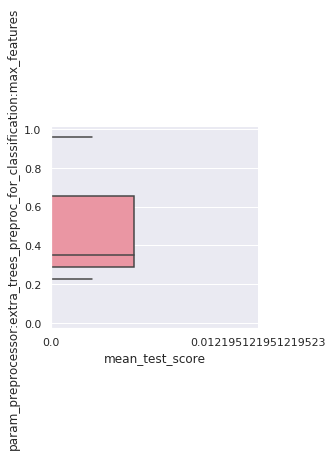

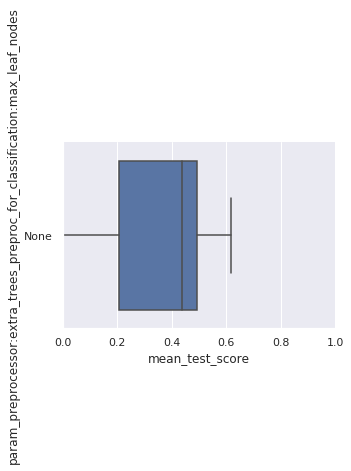

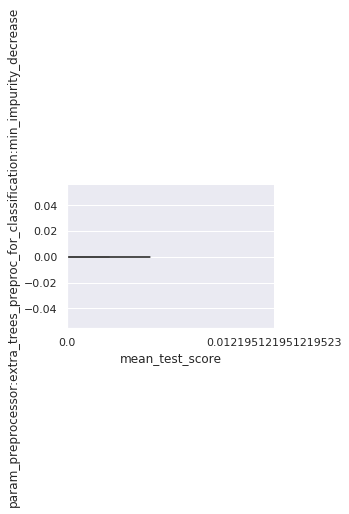

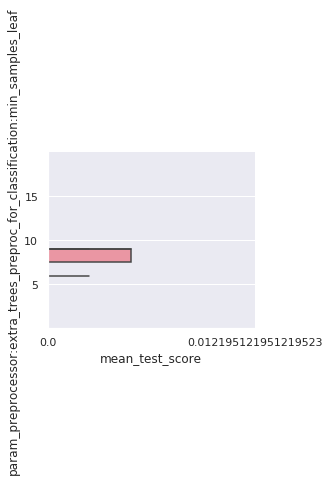

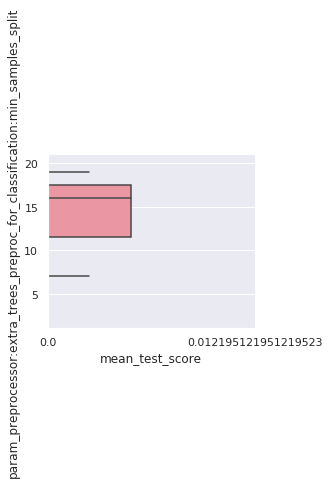

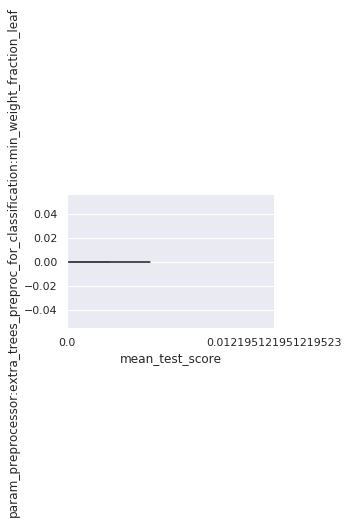

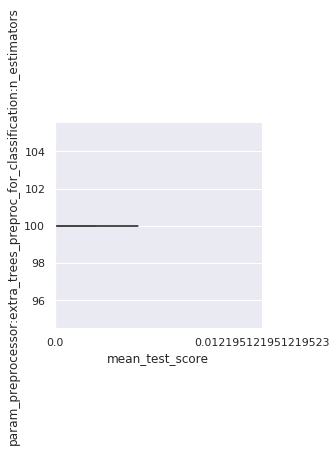

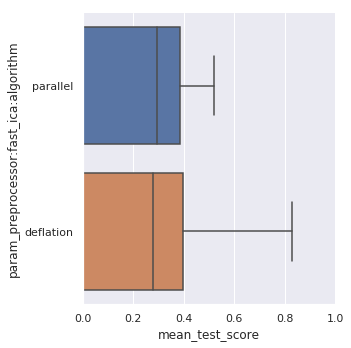

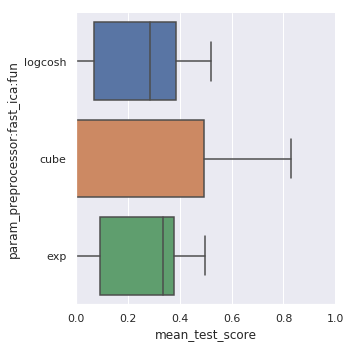

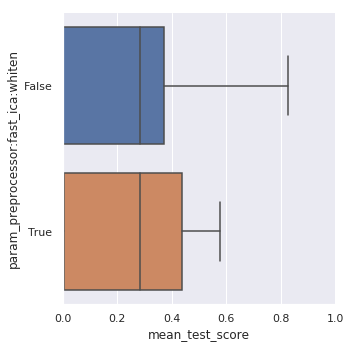

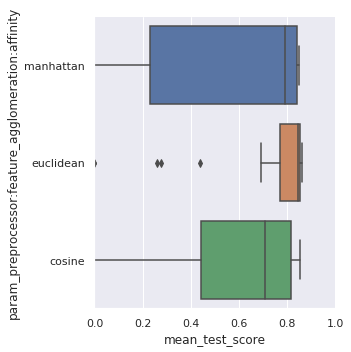

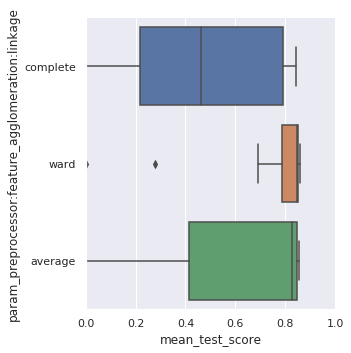

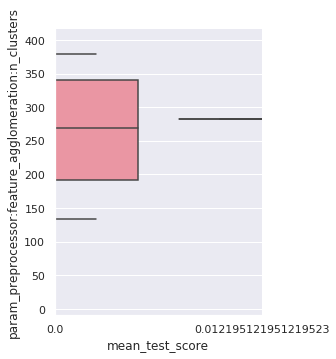

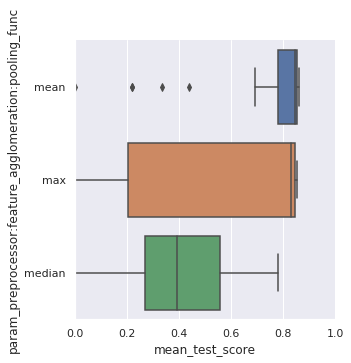

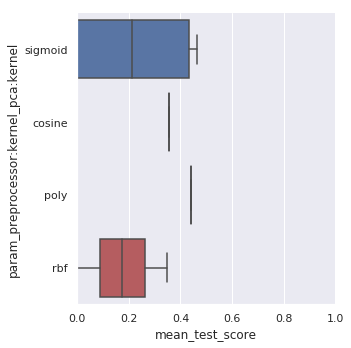

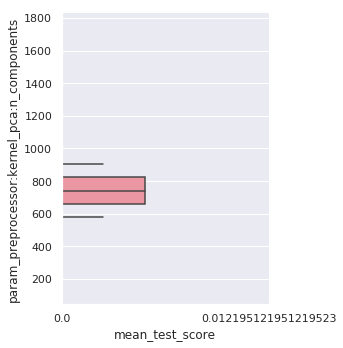

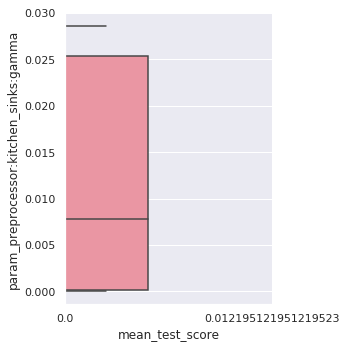

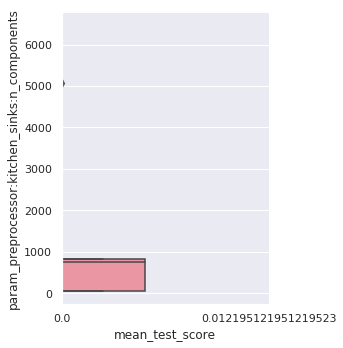

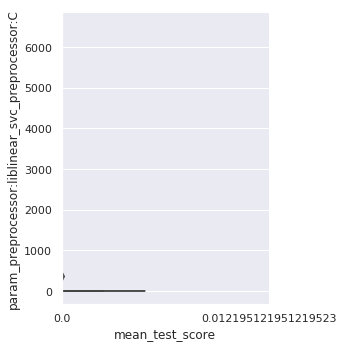

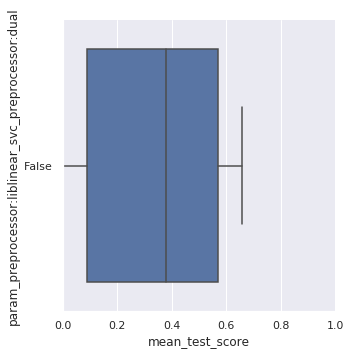

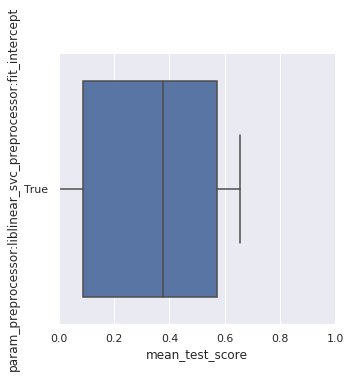

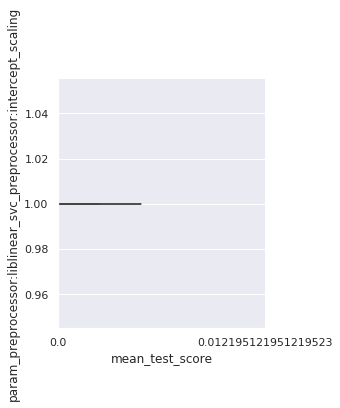

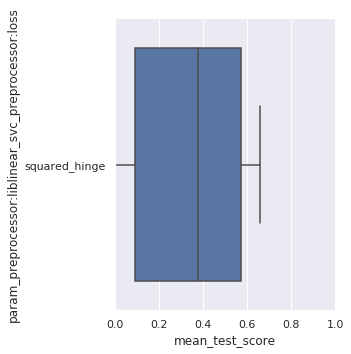

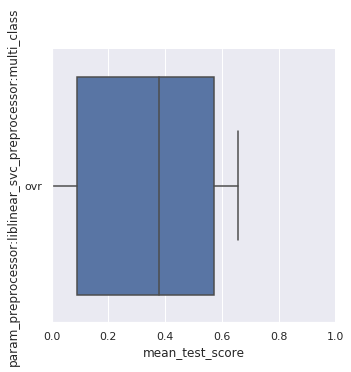

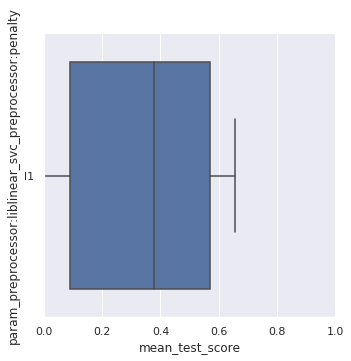

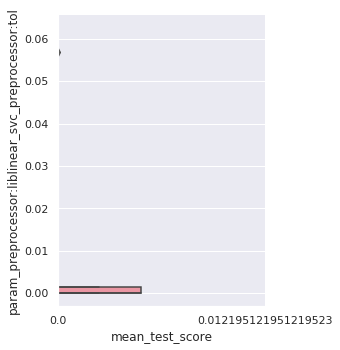

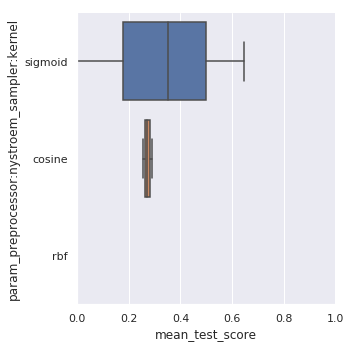

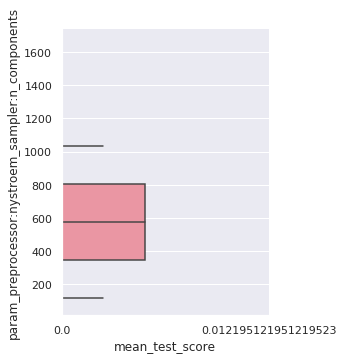

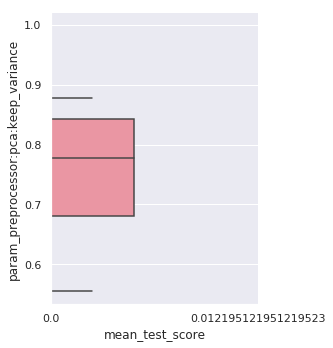

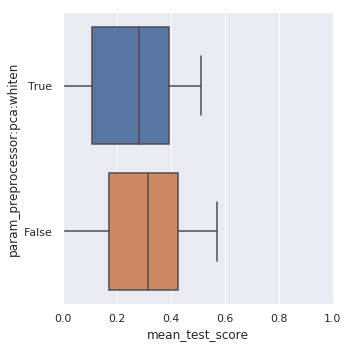

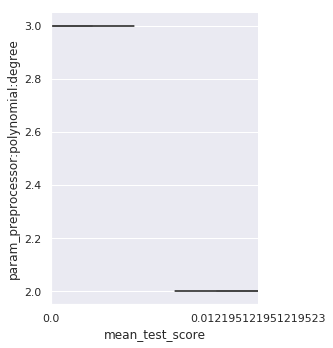

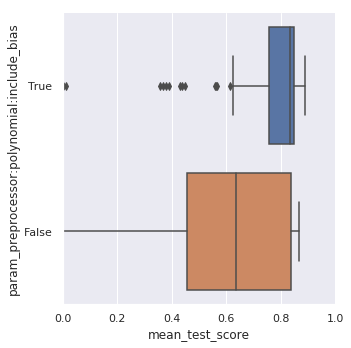

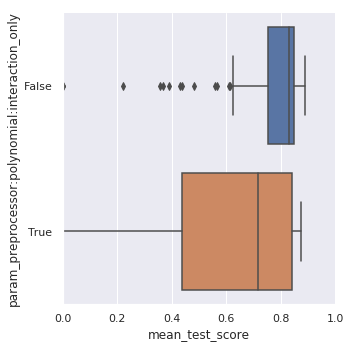

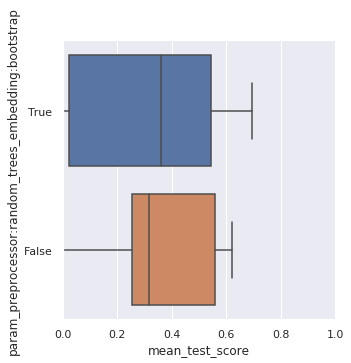

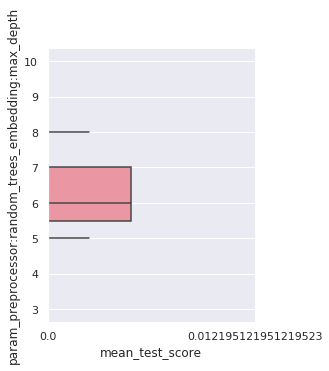

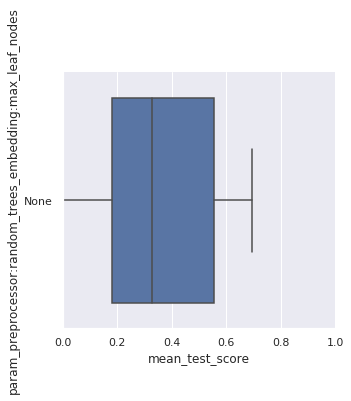

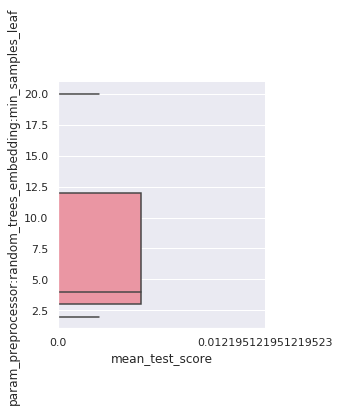

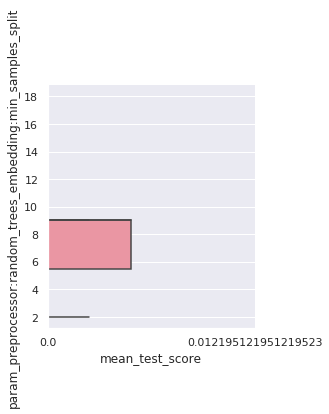

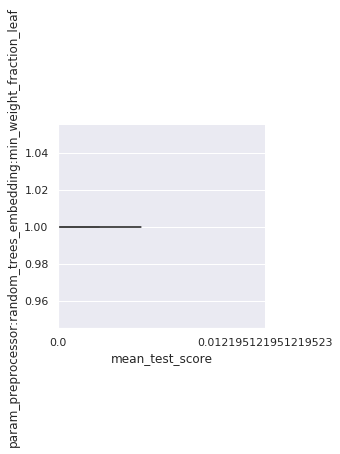

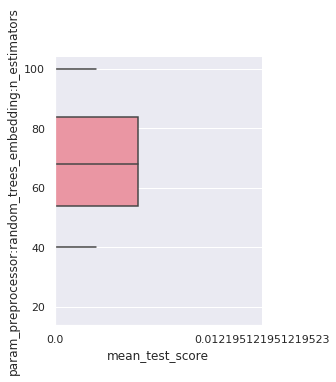

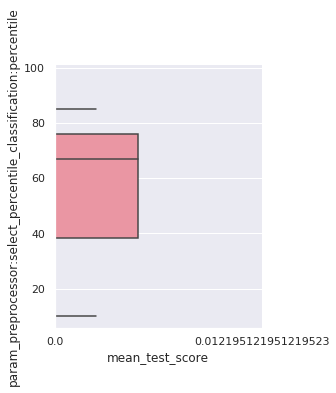

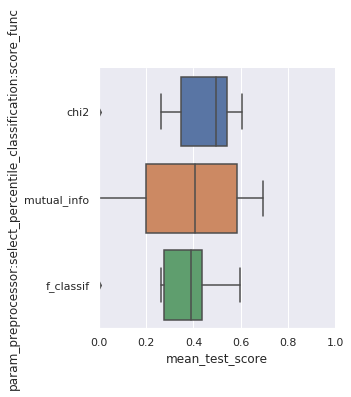

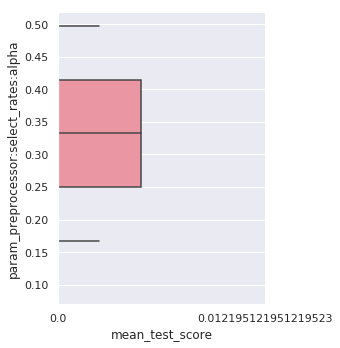

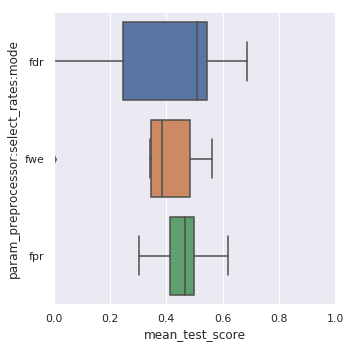

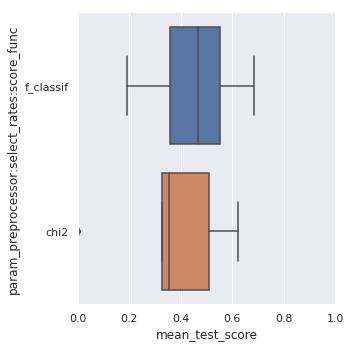

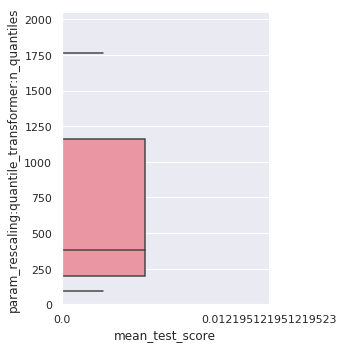

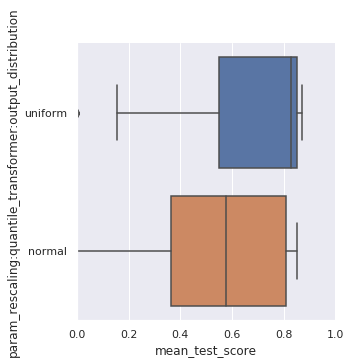

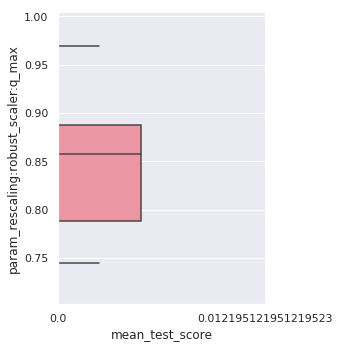

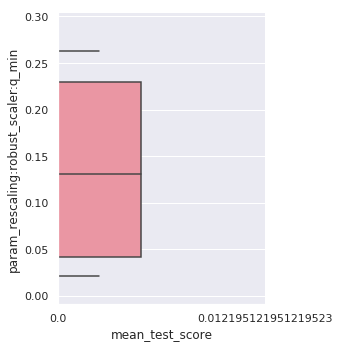

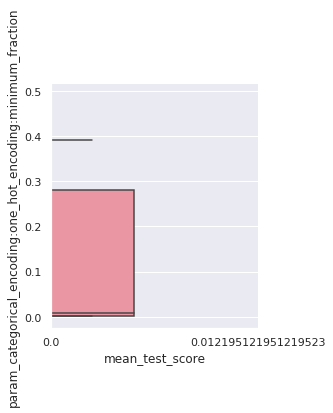

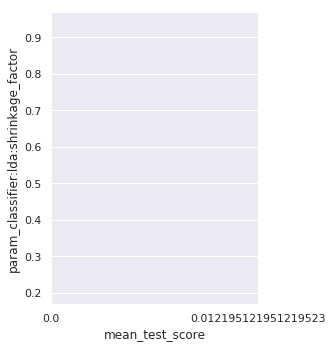

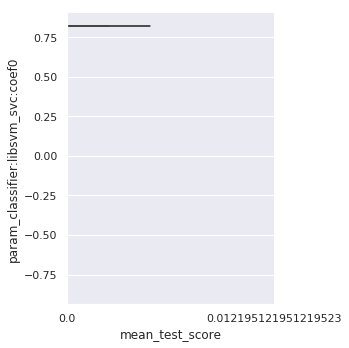

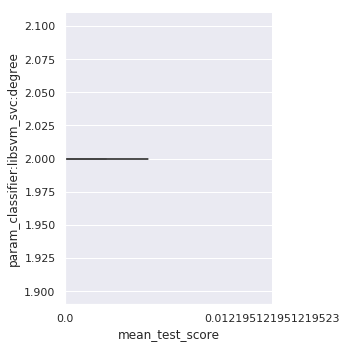

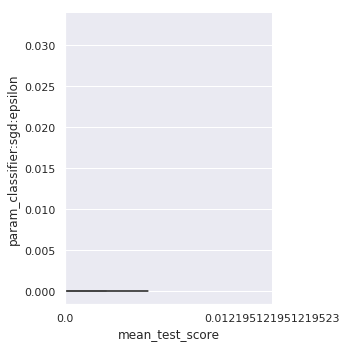

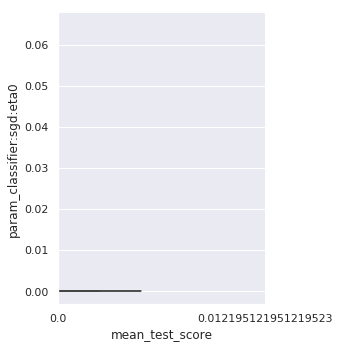

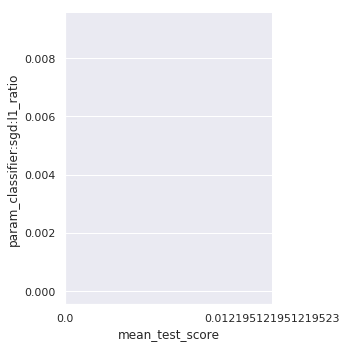

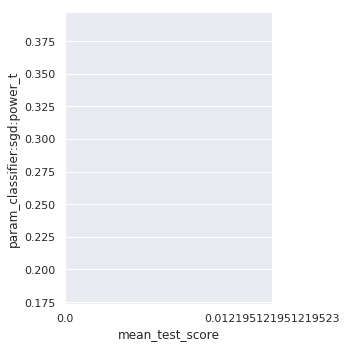

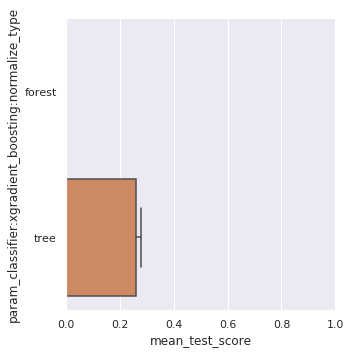

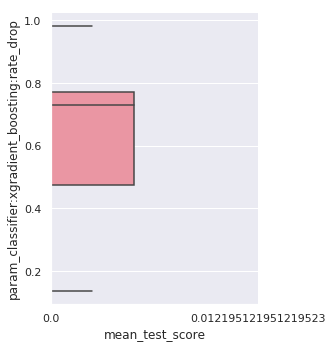

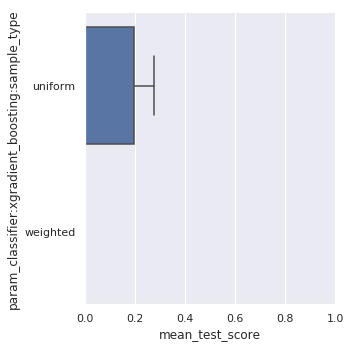

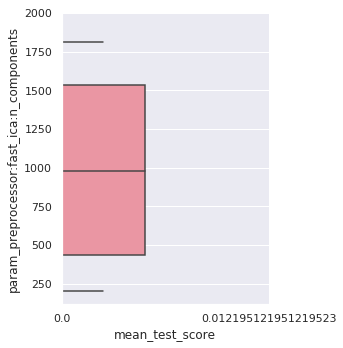

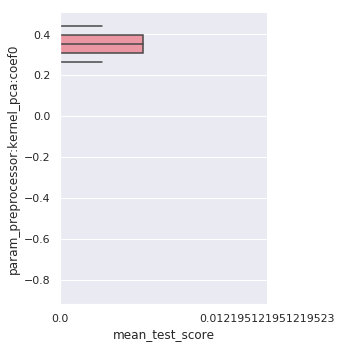

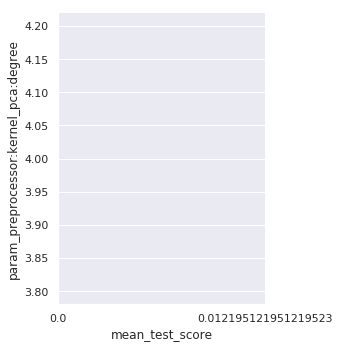

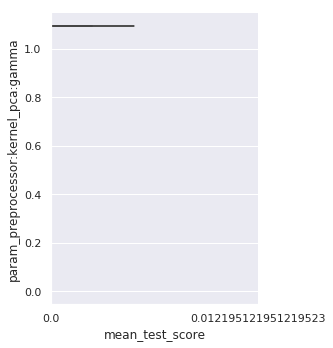

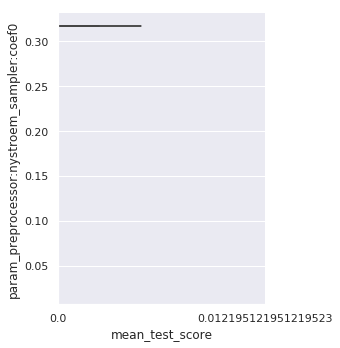

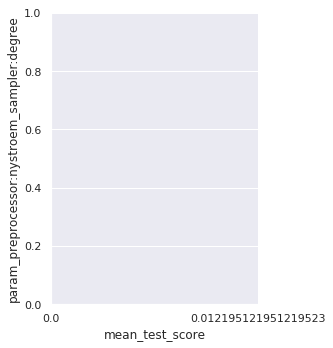

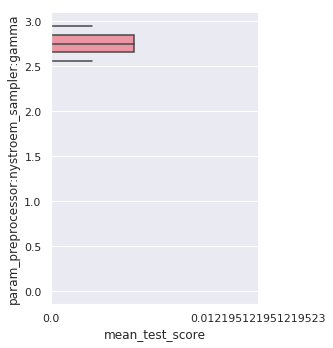

In [ ]:
idx = 0

for col in df.columns:
    if ':' not in col:
        continue
    
    if idx > 5:
        pass
    
    ax = sns.catplot(data=df, y=col, x='mean_test_score', kind='box')
    ax.set(
        xlim=(0, 1)
    )
    plt.show()
    
    idx += 1

Observons les corrélations deux-à-deux des facteurs explicatifs. Les couleurs indiquent si le client a résilié ou pas.

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


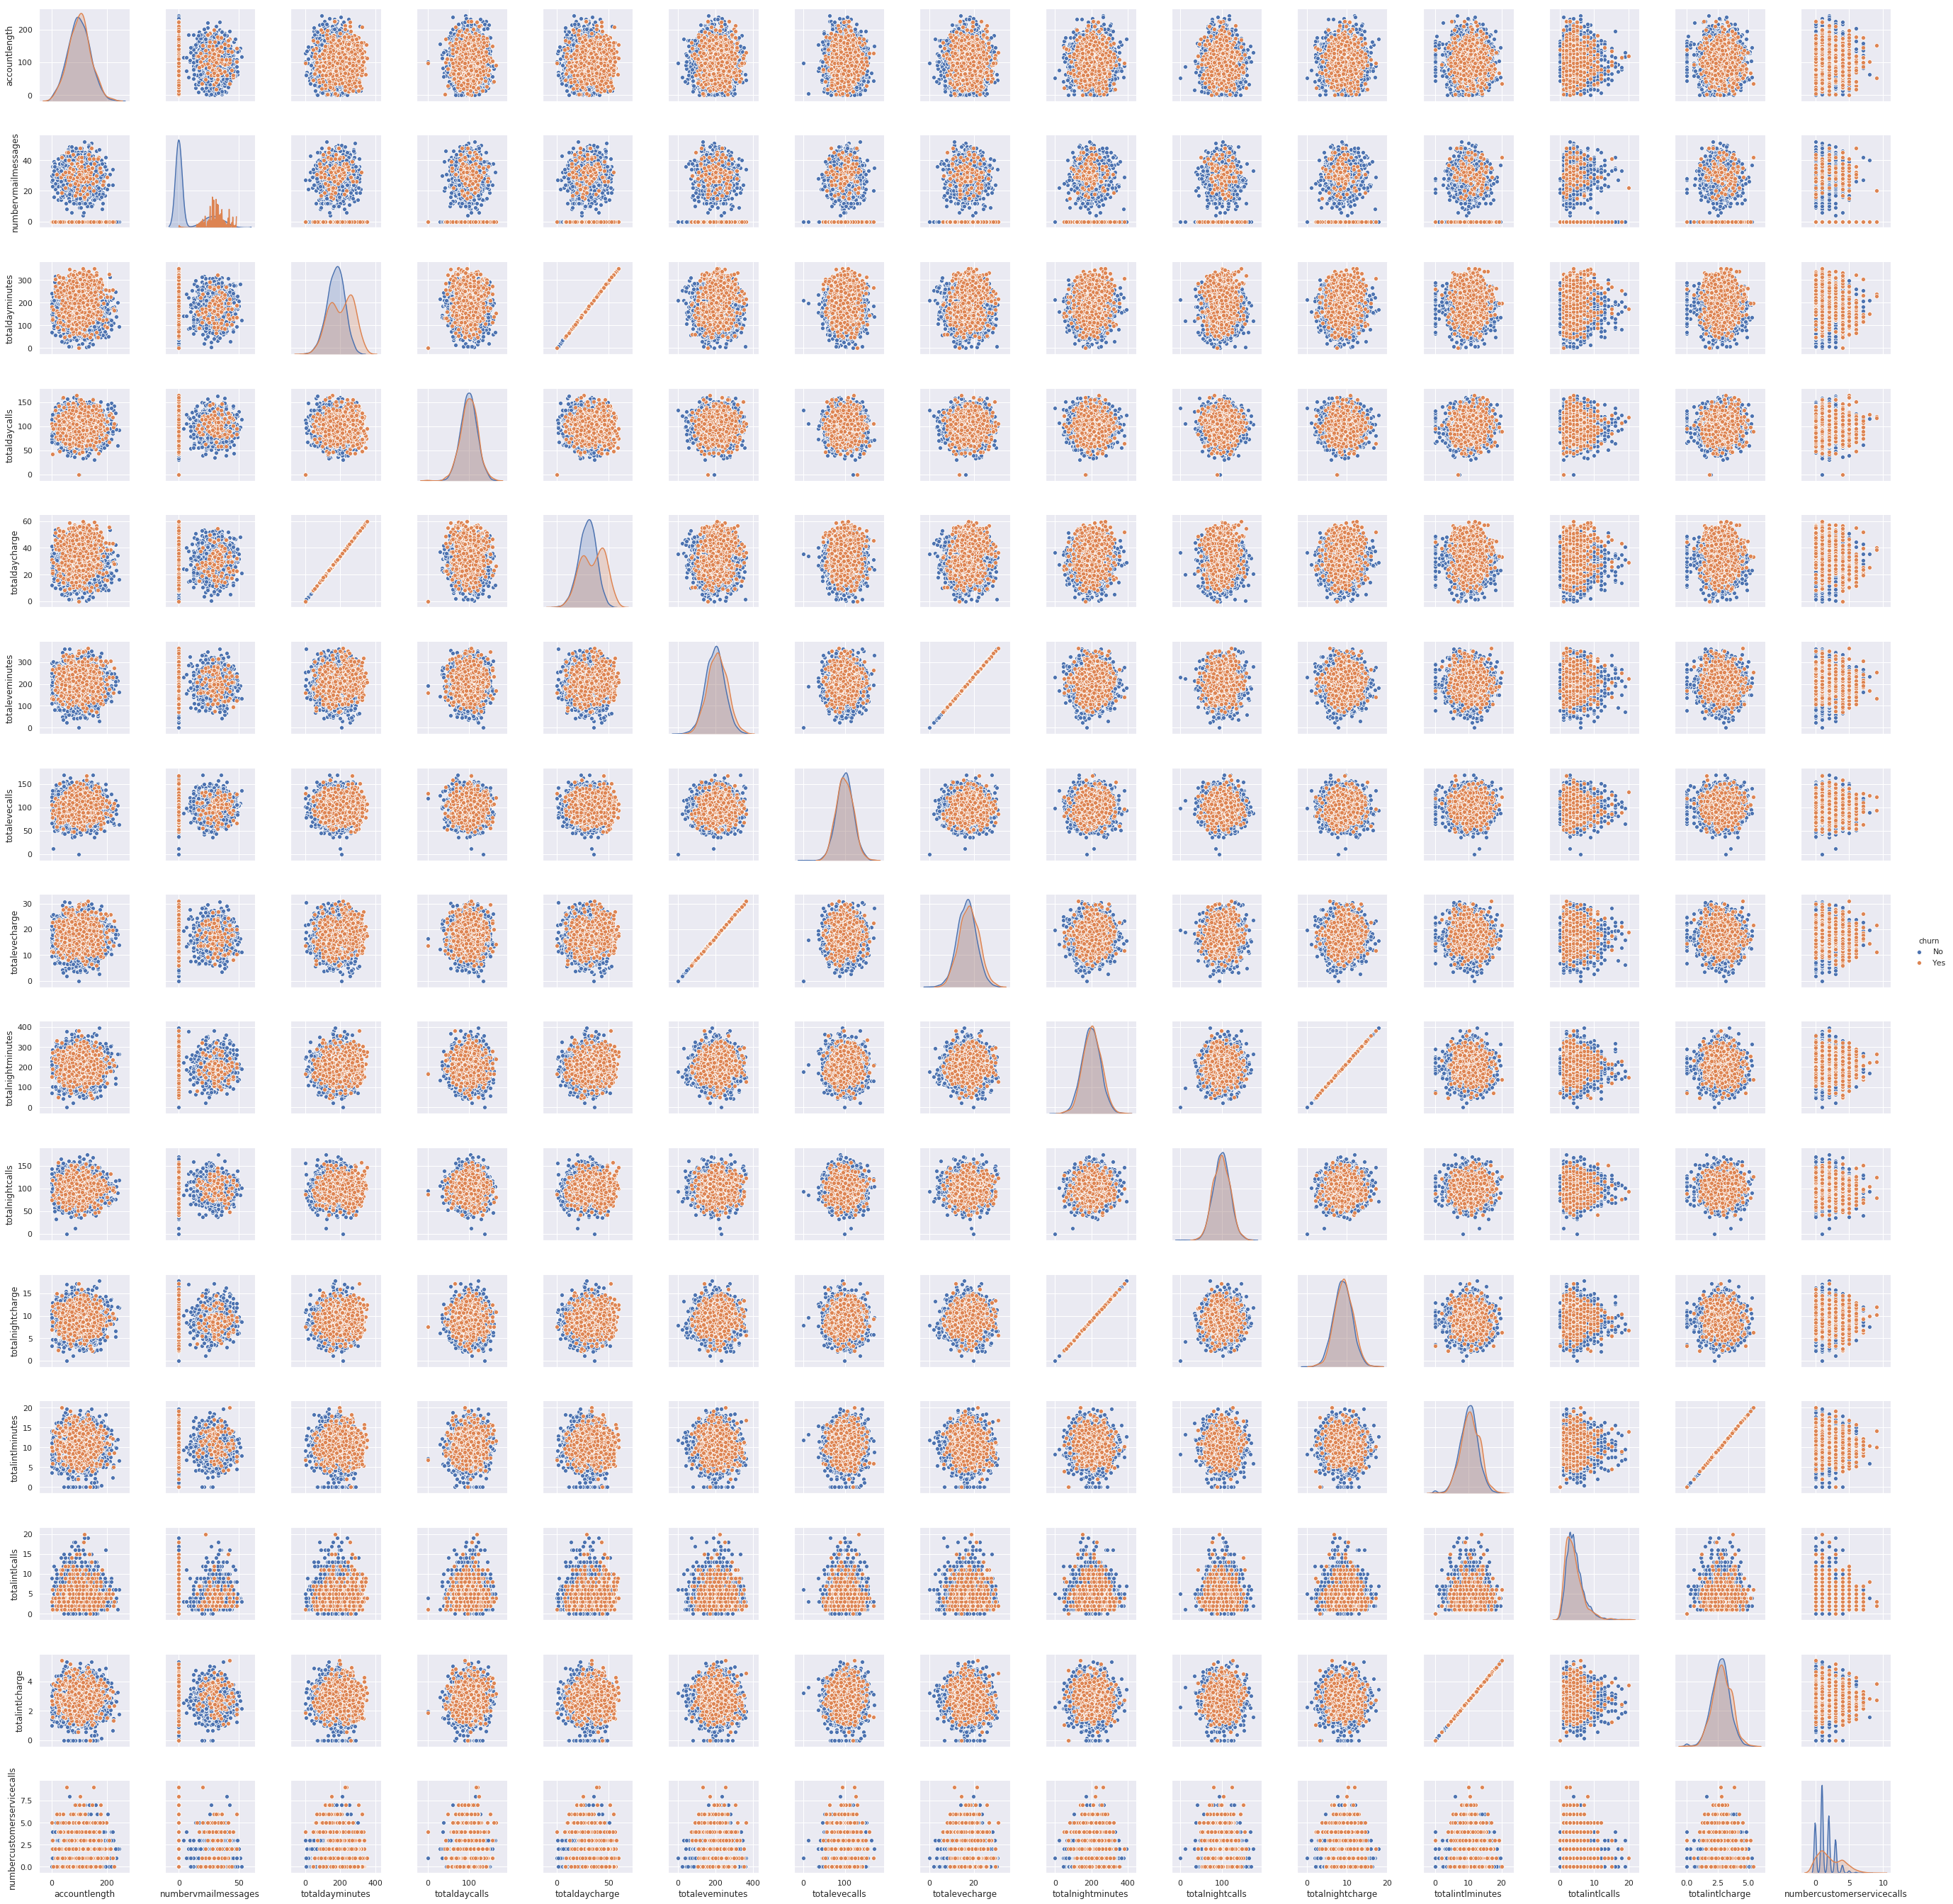

In [7]:
sns.pairplot(df, hue='churn')
plt.show()

Et la matrice de corrélation :

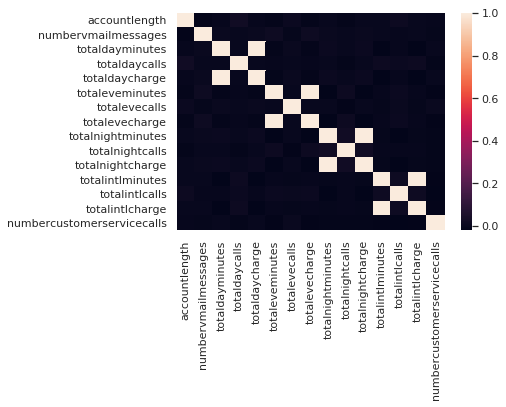

In [8]:
sns.heatmap(df.corr())
plt.show()

Supprimons les corrélations de 100%.

In [9]:
for col in ['totaldaycharge', 'totalevecharge', 'totalnightcharge',
            'totalintlcharge']:
    del df[col]

## Classification

Testons un premier algo.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
print(SCORERS.keys())
from sklearn.ensemble import RandomForestClassifier

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [11]:
X = df[[col for col in df if col not in ['churn', 'internationalplan',
                                         'voicemailplan']]]
y = df['churn']

cross_val_score(RandomForestClassifier(n_estimators=100), X, y == 'Yes',
                scoring='f1', cv=5)

array([0.64347826, 0.6784141 , 0.62264151, 0.69603524, 0.68807339])

In [12]:
cross_val_score(RandomForestClassifier(n_estimators=100), X, y == 'Yes',
                scoring='roc_auc', cv=5)

array([0.84466051, 0.85815065, 0.84830208, 0.90282117, 0.86029691])

Quel serait le score d'un classificateur qui tire au hasard ?

Quel serait le score d'un estimateur à seuil sur `totaldayminutes` et `numbercustomerservicecalls` ? Optimisez le seuil !

# Pipelines

Avec les pipelines, on va pouvoir faire toutes les pré-transformations de données directement comme si on utilisati un classificateur.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop(columns=['churn'])
y = df['churn']

In [15]:
drop_str_cols = ColumnTransformer(
    transformers=[
        ('drop_str_cols', 'drop', ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_v1 = Pipeline(steps=[
    ('drop_str_cols', drop_str_cols),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='f1', cv=5))
print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='roc_auc', cv=5))

[0.67826087 0.66956522 0.63551402 0.69683258 0.69369369]
[0.85751529 0.86150781 0.85128262 0.90096133 0.87181967]


# Que faire de données textuelles

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder()

ohe.fit_transform([['Yes'], ['Yes'], ['No']]).toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [18]:
enc_str_cols = ColumnTransformer(
    transformers=[
        ('enc_str_cols', OneHotEncoder(), ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_v1 = Pipeline(steps=[
    ('enc_str_cols', enc_str_cols),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='f1', cv=5))
print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='roc_auc', cv=5))

[0.78431373 0.77108434 0.78838174 0.7639485  0.82786885]
[0.91132827 0.91400498 0.90009825 0.92702805 0.93690588]


## Comparer à d'autres algos

C'oubliez pas de toujours comparer vos algorithmes sophistiqués à des algorithmes idiots.

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
print(cross_val_score(DummyClassifier("uniform"), X, y == 'Yes',
                      scoring='f1', cv=5))
print(cross_val_score(DummyClassifier("uniform"), X, y == 'Yes',
                      scoring='roc_auc', cv=5))

[0.22985075 0.22535211 0.215781   0.2347561  0.23510972]
[0.5 0.5 0.5 0.5 0.5]


In [21]:
print(cross_val_score(DummyClassifier("most_frequent"), X, y == 'Yes',
                      scoring='f1', cv=5))
print(cross_val_score(DummyClassifier("most_frequent"), X, y == 'Yes',
                      scoring='roc_auc', cv=5))

[0. 0. 0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5]


/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metric

# Exercice

Trouvez le meilleur AUC Score possible (on ne peut pas aller au-dessus de 100%...).

Le temps de calcul compte également !

Vous pouvez utilisez les algos que vous voulez.

In [22]:
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
enc_str_cols = ColumnTransformer(
    transformers=[
        ('enc_str_cols', OneHotEncoder(), ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_v1 = Pipeline(steps=[
    ('enc_str_cols', enc_str_cols),
    ('scaler', StandardScaler()),
    ('rf', GradientBoostingClassifier(n_estimators=500))
])

print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='f1', cv=5))
print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='roc_auc', cv=5))

[0.82758621 0.85171103 0.80645161 0.84615385 0.84375   ]
[0.91414845 0.91107413 0.91215251 0.92139067 0.94742846]


In [24]:
pipe_v1.fit(X, y)
%timeit y_pred = pipe_v1.predict(X)

40.7 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Je vous propose de tester toutes les variables explicatives afin de n'en retenir que les plus utiles.

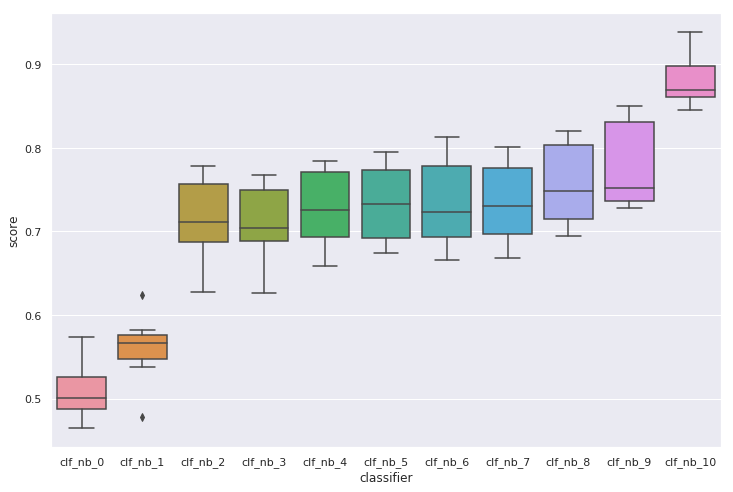

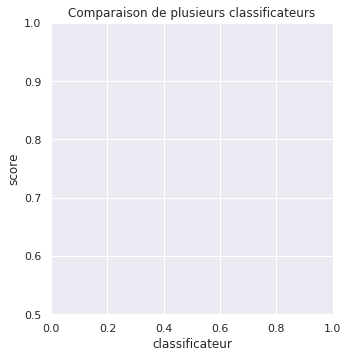

In [27]:
X = df[[col for col in df if col not in ['internationalplan', 'churn', 'voicemailplan']]]
y = df['churn']

nb = 10

df_res = pd.DataFrame()

for i in range(X.shape[1]):
    Xt = X.iloc[:, :i+1]
    
    clf = GradientBoostingClassifier()
    
    df_res = pd.concat([
        df_res,
        pd.DataFrame({
            'classifier': f'clf_nb_{i}',
            'score': cross_val_score(clf, Xt, y, cv=nb, scoring='roc_auc')
        })
    ])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.catplot(y='score', x='classifier', kind='box', data=df_res, ax=ax)

ax.set(
    title="Comparaison de plusieurs classificateurs",
    xlabel="classificateur",
    ylabel="score",
    ylim=[0.5, 1]
)